# Titanic Data Analysis – Task 3

## Aim
To clean the Titanic dataset, create new features, and visualize survival patterns using Exploratory Data Analysis (EDA).

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning
- Fill missing Age values with mean
- Drop Cabin column

In [16]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df.drop(columns=["Cabin"], inplace=True)

## Feature Engineering
Creating Family Size and Age Group features

In [17]:
df["FamilySize"] = df["SibSp"] + df["Parch"]

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0,12,18,30,50,80],
    labels=["Child","Teen","YoungAdult","Adult","Senior"]
)

## Age Distribution

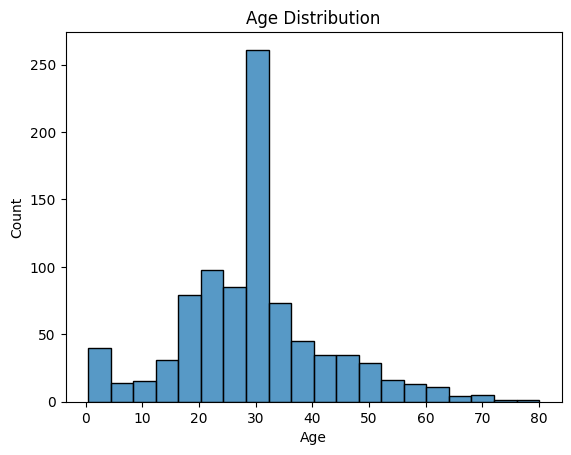

In [18]:
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution")
plt.show()

## Survival by Age Group

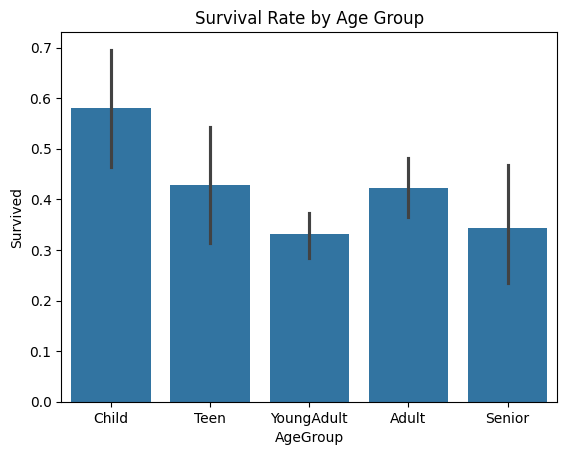

In [19]:
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by Age Group")
plt.show()

## Survival by Embarkation Port

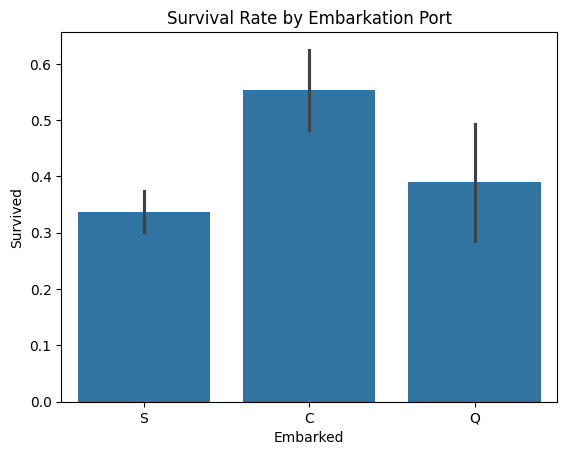

In [20]:
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()

## Survival by Family Size

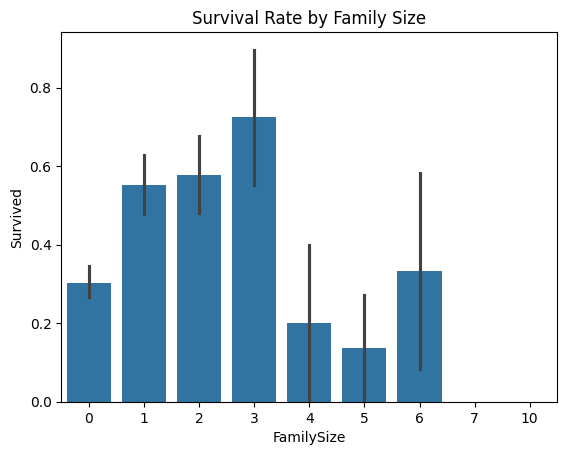

In [21]:
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

## Correlation Heatmap

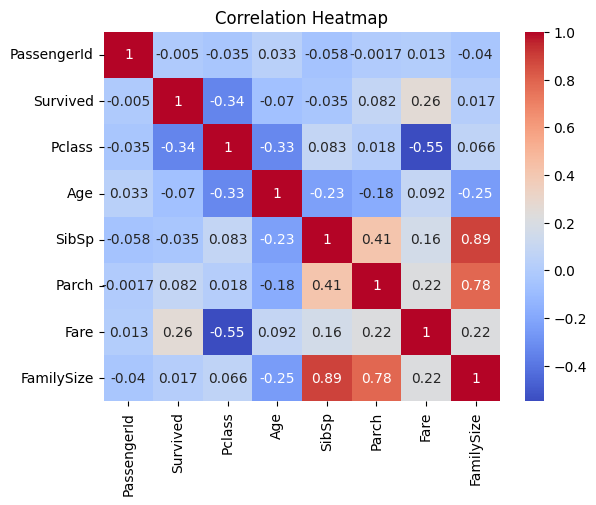

In [22]:
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Result
The dataset was cleaned, new features were created, and survival patterns were visualized using bar plots, histograms, and correlation heatmap.